# Бета-банк: определение оттока клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт ли клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

#### Инструкция по выполнению проекта

1. Загрузите и подготовьте данные. Поясните порядок действий.

2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

3. Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.

4. Проведите финальное тестирование.

#### Задачи

1. Подготовка данных
    * Критерии корректности подготовки данных
      Целое число процентов клиентов с нулевым балансом на счёте
    * C чем коррелирует возраст (Age) и баланс (Balance)?
      Укажите название признака.
    * Какое количество клиентов ушло?
    * Сколько всего мужчин?
    * Самая многочисленная страна клиентов банка?
      Укажите название страны.
2. Исследование задачи
    * Критерии корректности подготовки данных
      Является ли целевой признак сбалансированным?
    * Рассмотрим обучение модели без учета дисбаланса классов. 
      Возьмем 2 модели машинного обучения: Случайный лес и Логистическую регрессию. 
      У какой модели наибольшее значение F1-меры?
3. Баланс
    * Если наблюдается дисбаланс классов целевого признака, какие подходы мы можем использовать?
    * Как использование balanced повлияло на F1-меру для модели «Случайный лес»?
    * Как использование balanced повлияло на F1-меру для модели модели «Логистическая регрессия»?
    * Как использование upsampling повлияло на F1-меру для модели «Логистическая регрессия»?

#### Описание данных

##### Признаки

* `RowNumber` – индекс строки в данных
* `CustomerId` – уникальный идентификатор клиента
* `Surname` – фамилия 
* `CreditScore` – кредитный рейтинг
* `Geography` – страна проживания
* `Gender` – пол
* `Age` – возраст
* `Tenure` – количество недвижимости у клиента
* `Balance` – баланс на счёте
* `NumOfProducts` -количество продуктов банка, используемых клиентом
* `HasCrCard` – наличие кредитной карты
* `IsActiveMember` – активность клиента
* `EstimatedSalary` – предполагаемая зарплата

##### Целевой признак

* `Exited` – факт ухода клиента

### Шаг 0. Загрузка библиотек и настройка Jupyter Notebook

In [1]:
# библиотеки для предобработки и анализа данных 
import pandas as pd
import numpy as np

# библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
# библиотеки для работы в jupyter notebook
import warnings
warnings.filterwarnings(action='once')  # показывает предупреждения один раз
warnings.filterwarnings('ignore')

# форматируем вывод
pd.options.display.float_format = '{:.2f}'.format
# plt.rcParams['figure.figsize'] = (16, 4)
plt.style.use('seaborn-whitegrid')

### Шаг 1. Прочитаем файл с данными и подгоовим данные к обучению

In [3]:
raw_data = pd.read_csv('data/churn-data.csv')

In [6]:
raw_data.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9605,9606,15733444,Phillips,736,France,Female,29,9,0.00,2,0,0,176152.70,0
9140,9141,15784323,Gallo,449,France,Female,21,7,0.00,2,0,0,175743.92,0
3903,3904,15678129,Hill,643,Spain,Female,45,9,150840.03,2,1,0,155516.35,0
8849,8850,15721433,Hixson,664,France,Female,38,4,74306.19,2,1,0,154395.56,0
6992,6993,15808175,Castiglione,557,France,Female,39,7,49572.73,1,1,0,115287.99,1
8026,8027,15679743,Genovesi,607,France,Female,33,8,91301.72,1,0,1,130824.57,0


Посмотрим на <u>***типы данных***</u>:

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Типы данных соответствуют самим данным. Тип `Gender` имеет тип `object` хотя по факту является булевым типом, т.к. принимает только два уникальных значения `Female`, `Male`:

In [7]:
raw_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Пока оставим так, если потребуется преобразуем следующим образом: `Female` -> `0`, `Male` -> `1`.

Посмотрим, есть ли <u>***пропуски в данных***</u>:

In [9]:
raw_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Пропусков нет.

Посмотрим, если <u>***дубликаты***</u>:

In [11]:
raw_data.duplicated().sum()

0

Дубликатов также нет.

### Шаг 2. Подготовка данных

* Целое число процентов клиентов с нулевым балансом на счёте
* C чем коррелирует возраст (Age) и баланс (Balance)? Укажите название признака.
* Какое количество клиентов ушло?
* Сколько всего мужчин?
* Самая многочисленная страна клиентов банка? Укажите название страны.

##### Целое число процентов клиентов с нулевым балансом на счёте:

In [77]:
f"Число клиентов с нулевым балансом на счете: {raw_data.query('Balance == 0').shape[0] / raw_data.shape[0]:.2%}"

'Число клиентов с нулевым балансом на счете: 36.17%'

In [71]:
raw_data.groupby('CustomerId')['Balance']\
        .sum()\
        .reset_index()\
        .query('Balance == 0')\
        .shape

(3617, 2)

##### C чем коррелирует возраст (Age) и баланс (Balance)? Укажите название признака

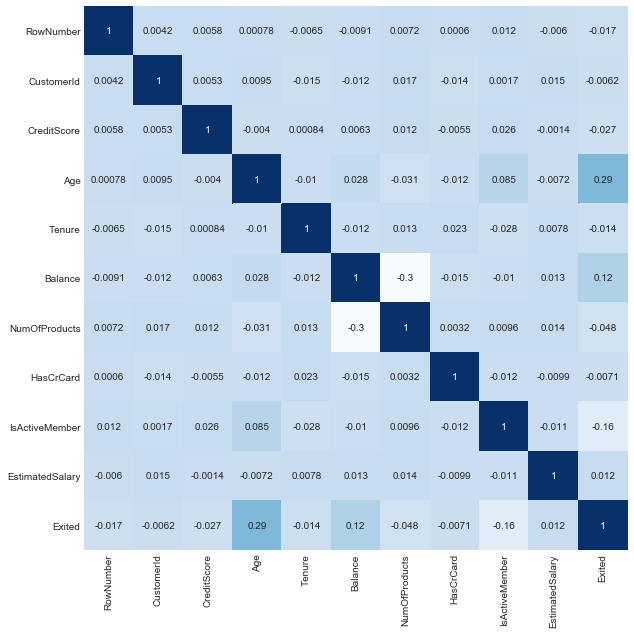

In [34]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(raw_data.corr(), annot=True, square=True, cmap='Blues', cbar=False, ax=ax);

Наибольшая корреляция у признака `Age` с признаком `Exited`. А у признака `Balance` с признаком `NumOfProducts`.

##### Какое количество клиентов ушло?

In [62]:
raw_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

##### Сколько всего мужчин?

In [63]:
raw_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

##### Самая многочисленная страна клиентов банка? Укажите название страны.

In [64]:
raw_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [74]:
raw_data.groupby('CustomerId')['Geography']\
        .count()\
        .reset_index()\
        .query('Geography > 1')

,CustomerId,Geography


In [75]:
raw_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)